# Text Mining Project

Text Mining project


In [139]:
#pip install langdetect


In [140]:
import pandas as pd
from langdetect import detect
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [141]:


train = pd.read_excel("train.xlsx")
train_reviews = pd.read_excel("train_reviews.xlsx")
test = pd.read_excel("test.xlsx")
test_reviews = pd.read_excel("test_reviews.xlsx")



## Data exploration

In [142]:
train.head()

,index,description,host_about,unlisted
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0


In [143]:
train_reviews.head()

,index,comments
0,1,this is a very cozy and comfortable house to s...
1,1,good<br/>
2,1,"My first hostel experience, and all I have to ..."
3,1,Das Hostel war neu und deshalb funktionierte a...
4,1,"It was fine for a dorm, but I think for the pe..."


In [144]:
test.head()

,index,description,host_about
0,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de..."
1,2,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...
2,3,"Bright, beautiful, and spacious. This four-bed...","Hi there!\n\nWe're GuestReady, a professional ..."
3,4,Charming Apartment Close to the Bay of Cascais...,:)
4,5,"Se procura umas férias perto da praia, casino ...",Bem vindos a Portugal!_x000D_\nAdoro o meu Paí...


In [145]:
test_reviews.head()

,index,comments
0,1,Thank you very much Antonio ! All has been per...
1,1,Very nice appartment in the old town of Lissab...
2,1,When travelling we're looking for kids friendl...
3,1,We've been in Lisbon in march 2013 (3 adults a...
4,1,Our host Antonio was very helpful with informa...


In [146]:
print("train shape:", train.shape)
print("train_reviews shape:", train_reviews.shape)
print("test shape:", test.shape)
print("test_reviews shape:", test_reviews.shape)


train shape: (6248, 4)
train_reviews shape: (361281, 2)
test shape: (695, 3)
test_reviews shape: (41866, 2)


in DATASETS the index repeats, which may indicate that refers to a specific house. We'll change this column to house ID


In [147]:
train.rename(columns={'index': 'houseID'}, inplace=True)
train_reviews.rename(columns={'index': 'houseID'}, inplace=True)
test.rename(columns={'index': 'houseID'}, inplace=True)
test_reviews.rename(columns={'index': 'houseID'}, inplace=True)



In [148]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6248 entries, 0 to 6247
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   houseID      6248 non-null   int64 
 1   description  6248 non-null   object
 2   host_about   6248 non-null   object
 3   unlisted     6248 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 195.4+ KB


there's no missing values in any feature

In [149]:
train_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361281 entries, 0 to 361280
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   houseID   361281 non-null  int64 
 1   comments  361279 non-null  object
dtypes: int64(1), object(1)
memory usage: 5.5+ MB


In [150]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   houseID      695 non-null    int64 
 1   description  695 non-null    object
 2   host_about   695 non-null    object
dtypes: int64(1), object(2)
memory usage: 16.4+ KB


In [151]:
test_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41866 entries, 0 to 41865
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   houseID   41866 non-null  int64 
 1   comments  41866 non-null  object
dtypes: int64(1), object(1)
memory usage: 654.3+ KB


In [152]:
train

,houseID,description,host_about,unlisted
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0
...,...,...,...,...
6243,6244,"Studio 15 is a new, very well decorated and co...",I'm a Brand Manager from Lisbon in Portugal bu...,0
6244,6245,Lisbon meets a cosmopolitan industrial one-bed...,Home is where feelings are visitors. How do we...,0
6245,6246,<b>License number</b><br />Exempt,I am a travel agent passionate by cultures. \n...,1
6246,6247,Campo Pequeno Prestige is a classy and top qua...,Família_x000D_\nPortugal_x000D_\nGavião_x000D_...,0


In [153]:
train_reviews

,houseID,comments
0,1,this is a very cozy and comfortable house to s...
1,1,good<br/>
2,1,"My first hostel experience, and all I have to ..."
3,1,Das Hostel war neu und deshalb funktionierte a...
4,1,"It was fine for a dorm, but I think for the pe..."
...,...,...
361276,6248,The location was perfect. The apartment was ve...
361277,6248,Ana's place is exactly as described and even b...
361278,6248,A Ana foi muito atenciosa e preocupou se com o...
361279,6248,No wifi nor answer. <br/>The wifi can’t be con...


In [154]:
train = train.copy()
train_reviews = train_reviews.copy()
test = test.copy()
test_reviews = test_reviews.copy()

In [155]:
train.duplicated().sum()

0

In [156]:
train_reviews.duplicated().sum()

142

In [157]:
duplicates_train_reviews =train_reviews[train_reviews.duplicated(keep=False)]
print(duplicates_train_reviews)


        houseID                                           comments
3248         61                                         Excelente!
3254         61                                         Excelente!
4225         70                              Everything was great!
4263         70                              Everything was great!
6584        144  Sofia is an incredible host, and made us feel ...
...         ...                                                ...
353703     6106                                              Super
358567     6182                                    Great location!
358568     6182                                    Great location!
359054     6202                                        Great place
359076     6202                                        Great place

[273 rows x 2 columns]


In [158]:
test.duplicated().sum()

0

In [159]:
test_reviews.duplicated().sum()

15

In [160]:
duplicates_test_reviews =test_reviews[test_reviews.duplicated(keep=False)]
print(duplicates_test_reviews)

       houseID                                           comments
1622        42                                        Great place
1645        42                                        Great place
8862       155                                               Good
8884       155                                               Good
11302      178                                       Great place!
11416      178                                    Great location!
11445      178                                    Great location!
11454      178                                       Great place!
11631      179                                                  .
11829      179                                                  .
16030      246  We had a nice stay and friendly contacts. Than...
16031      246  We had a nice stay and friendly contacts. Than...
16685      255                                                  .
16783      255                                                  .
18846     

In [161]:
train.isna().sum()


houseID        0
description    0
host_about     0
unlisted       0
dtype: int64

In [162]:
train_reviews.isna().sum()

houseID     0
comments    2
dtype: int64

In [163]:
test.isna().sum()

houseID        0
description    0
host_about     0
dtype: int64

In [164]:
test_reviews.isna().sum()

houseID     0
comments    0
dtype: int64

In [165]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
houseID,6248.0,3124.500000,1803.786573,1.0,1562.75,3124.5,4686.25,6248.0
unlisted,6248.0,0.273367,0.445724,0.0,0.00,0.0,1.00,1.0


In [166]:
def detect_language(text):
    try:
        return detect(text)
    except:
        return "Unknown"

train["description_language"] = train["description"].apply(detect_language)
train.head()
train_reviews["comment_language"] = train_reviews["comments"].apply(detect_language)

In [167]:
train_reviews["comment_language"].value_counts()

comment_language
en         232343
fr          53254
pt          22459
es          19233
de          14216
it           5680
nl           3582
ru           1500
ko           1471
zh-cn        1034
Unknown       920
ro            820
pl            597
ca            570
da            459
sv            374
af            336
no            306
so            278
cs            211
fi            199
id            161
tl            151
hu            137
ja            110
cy            102
he             91
zh-tw          90
hr             79
sw             74
sk             71
tr             68
lt             60
el             49
vi             48
uk             45
sl             36
et             20
bg             16
lv             11
ar              9
sq              8
mk              2
ur              1
Name: count, dtype: int64

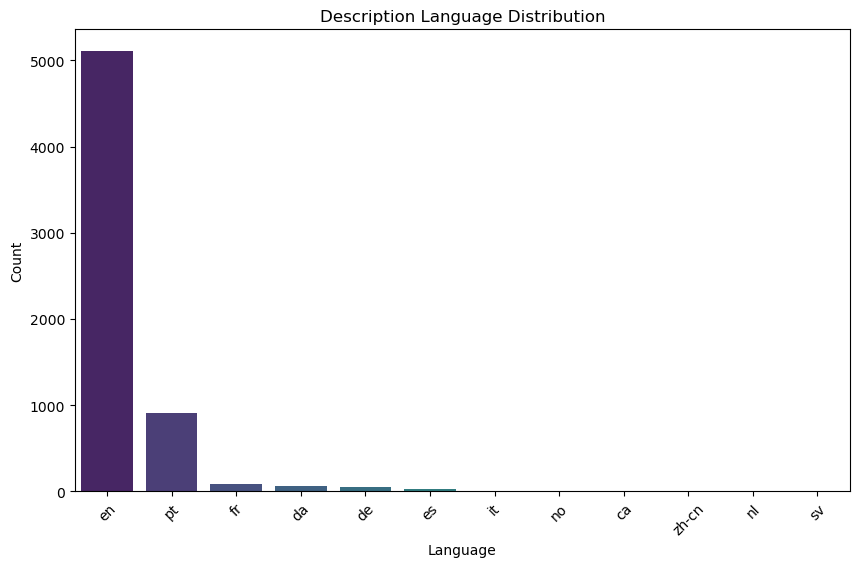

In [168]:
language_counts = train["description_language"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")
plt.title("Description Language Distribution")
plt.xlabel("Language")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [169]:
train_reviews["comment_language"].value_counts()

comment_language
en         232343
fr          53254
pt          22459
es          19233
de          14216
it           5680
nl           3582
ru           1500
ko           1471
zh-cn        1034
Unknown       920
ro            820
pl            597
ca            570
da            459
sv            374
af            336
no            306
so            278
cs            211
fi            199
id            161
tl            151
hu            137
ja            110
cy            102
he             91
zh-tw          90
hr             79
sw             74
sk             71
tr             68
lt             60
el             49
vi             48
uk             45
sl             36
et             20
bg             16
lv             11
ar              9
sq              8
mk              2
ur              1
Name: count, dtype: int64

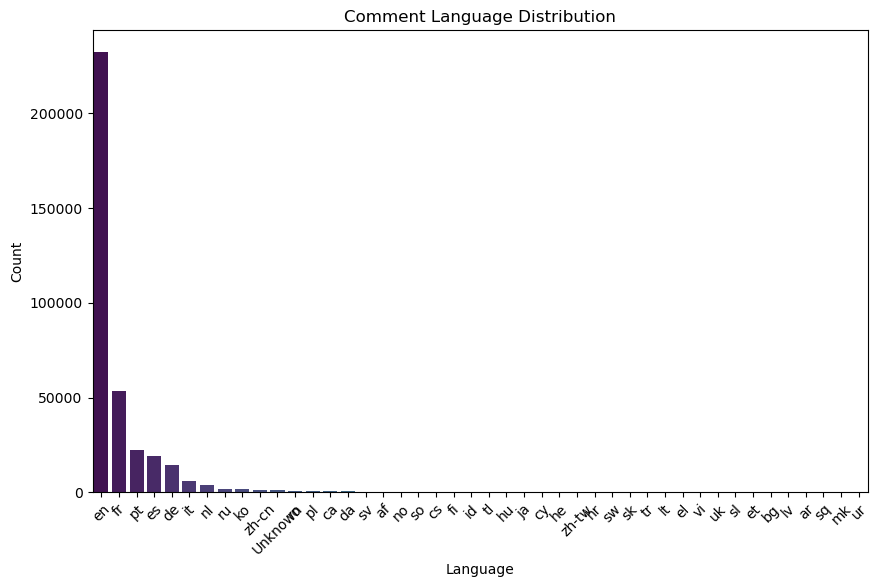

In [170]:
language_counts = train_reviews["comment_language"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")
plt.title("Comment Language Distribution")
plt.xlabel("Language")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

'en': English 
'pt': Portuguese
'fr': French
'es': Spanish
'de': German
'da': Danish
'no': Norwegian
'sv': Swedish
'it': Italian
'ca': Catalan
'zh-cn': Chinese (Simplified)
'nl': Dutch

In [171]:
def detect_language(text):
    try:
        return detect(text)
    except:
        return "Unknown"

test["description_language"] = test["description"].apply(detect_language)
test.head()
test_reviews["comment_language"] = test_reviews["comments"].apply(detect_language)

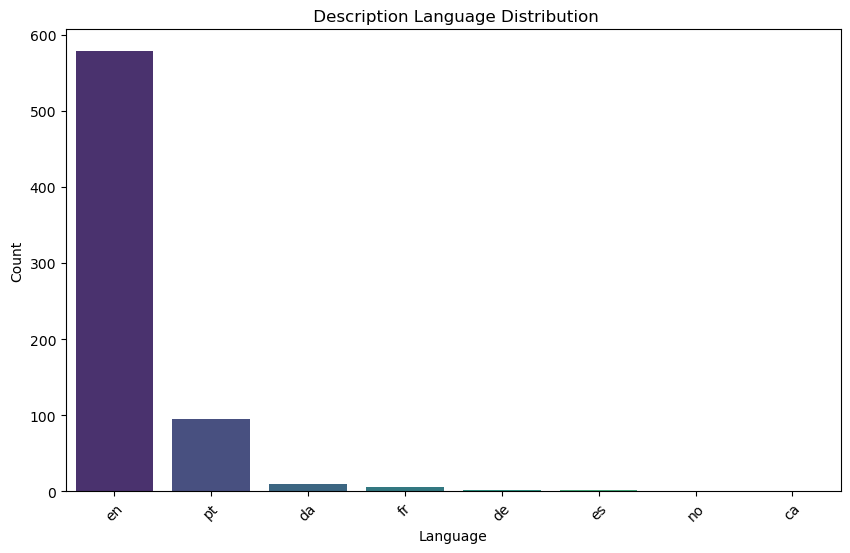

In [172]:
language_counts_test = test["description_language"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts_test.index, y=language_counts_test.values, palette="viridis")
plt.title(" Description Language Distribution")
plt.xlabel("Language")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [173]:
test["description_language"].value_counts()

description_language
en    578
pt     95
da     10
fr      6
de      2
es      2
no      1
ca      1
Name: count, dtype: int64

In [174]:
test_reviews["comment_language"].value_counts()

comment_language
en         27602
fr          5930
pt          2185
es          2166
de          1749
it           629
nl           426
ko           194
ru           151
Unknown      125
zh-cn        116
ro            68
ca            64
pl            60
sv            45
da            45
af            33
no            28
fi            26
so            25
hu            24
cs            22
ja            20
cy            19
id            18
tl            16
he            13
zh-tw         13
el             9
hr             8
tr             8
lt             7
sk             5
vi             4
bg             3
sw             3
ar             2
uk             2
mk             1
kn             1
lv             1
Name: count, dtype: int64

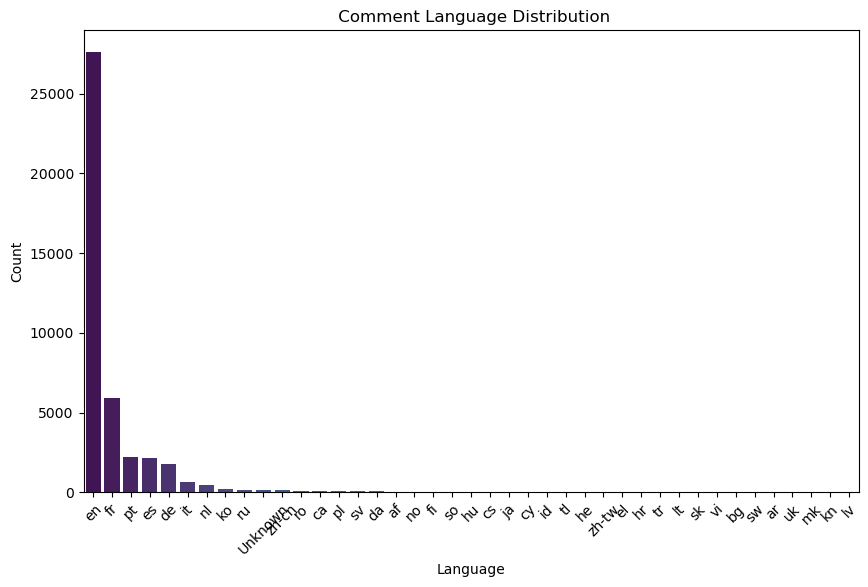

In [175]:
language_counts_test_2 = test_reviews["comment_language"].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts_test_2.index, y=language_counts_test_2.values, palette="viridis")
plt.title(" Comment Language Distribution")
plt.xlabel("Language")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [176]:
train_reviews


,houseID,comments,comment_language
0,1,this is a very cozy and comfortable house to s...,en
1,1,good<br/>,cy
2,1,"My first hostel experience, and all I have to ...",en
3,1,Das Hostel war neu und deshalb funktionierte a...,de
4,1,"It was fine for a dorm, but I think for the pe...",en
...,...,...,...
361276,6248,The location was perfect. The apartment was ve...,en
361277,6248,Ana's place is exactly as described and even b...,en
361278,6248,A Ana foi muito atenciosa e preocupou se com o...,pt
361279,6248,No wifi nor answer. <br/>The wifi can’t be con...,en


In [177]:
train

,houseID,description,host_about,unlisted,description_language
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,en
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1,pt
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1,en
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0,pt
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0,fr
...,...,...,...,...,...
6243,6244,"Studio 15 is a new, very well decorated and co...",I'm a Brand Manager from Lisbon in Portugal bu...,0,en
6244,6245,Lisbon meets a cosmopolitan industrial one-bed...,Home is where feelings are visitors. How do we...,0,en
6245,6246,<b>License number</b><br />Exempt,I am a travel agent passionate by cultures. \n...,1,en
6246,6247,Campo Pequeno Prestige is a classy and top qua...,Família_x000D_\nPortugal_x000D_\nGavião_x000D_...,0,en


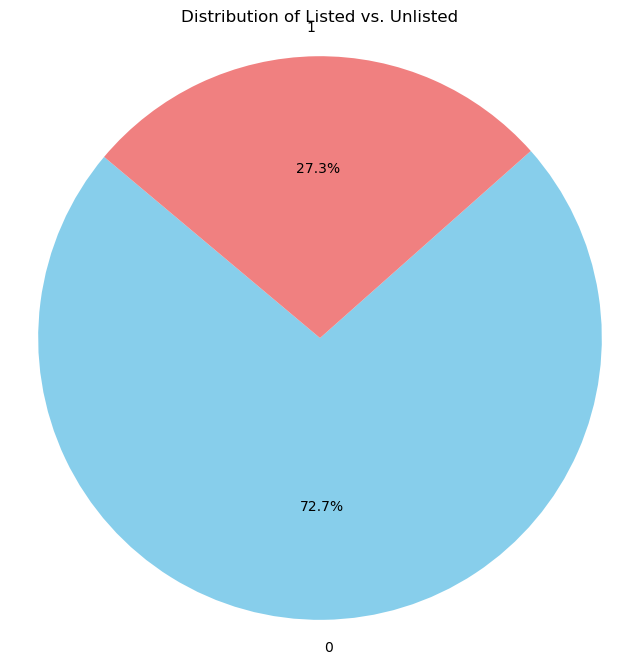

In [178]:
unlisted_counts = train['unlisted'].value_counts()

# Plotting the pie chart for the 'unlisted' column
plt.figure(figsize=(8, 8))
plt.pie(unlisted_counts, labels=unlisted_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Listed vs. Unlisted')
plt.axis('equal')  
plt.show()

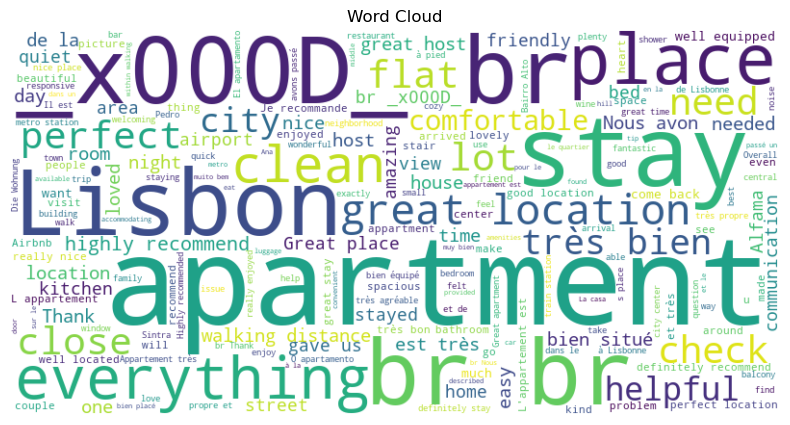

In [179]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Joining all the reviews into a single string, replacing NaNs with empty strings
all_reviews = ' '.join(str(comment) for comment in train_reviews['comments'] if pd.notna(comment))

# Create WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_reviews)

# Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud')
plt.show()


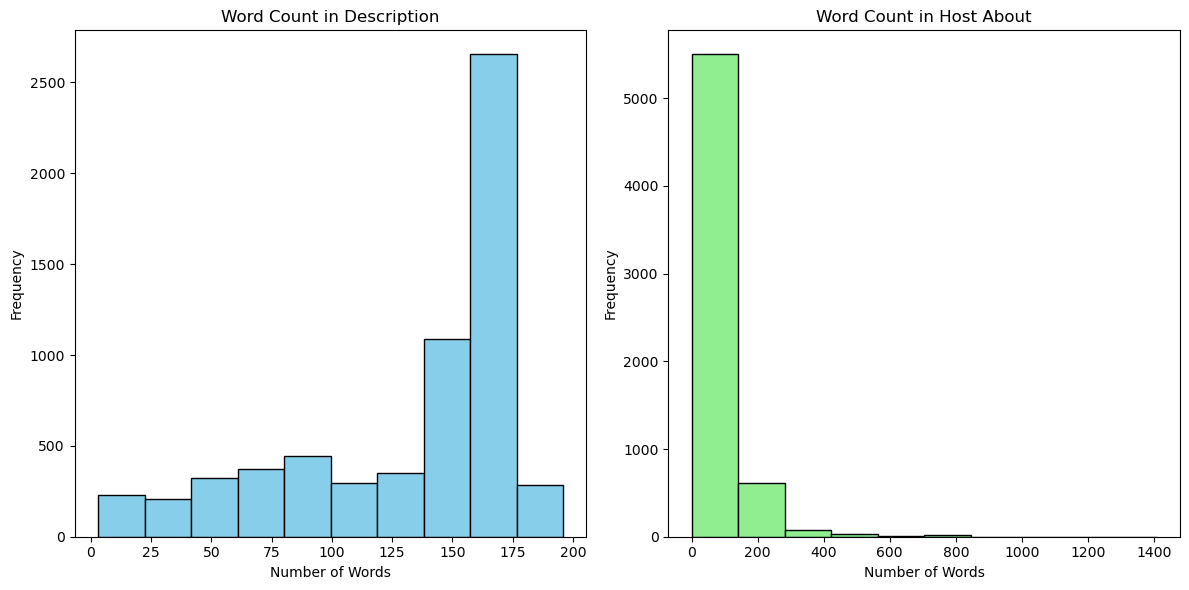

In [180]:
def count_words(text):
    return len(text.split())

# Apply word count function to each column
train['description_word_count'] = train['description'].apply(count_words)
train['host_about_word_count'] = train['host_about'].apply(count_words)

# Plot histograms
plt.figure(figsize=(12, 6))

# Histogram for description word count
plt.subplot(1, 2, 1)
plt.hist(train['description_word_count'], bins=10, color='skyblue', edgecolor='black')
plt.title('Word Count in Description')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

# Histogram for host_about word count
plt.subplot(1, 2, 2)
plt.hist(train['host_about_word_count'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Word Count in Host About')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

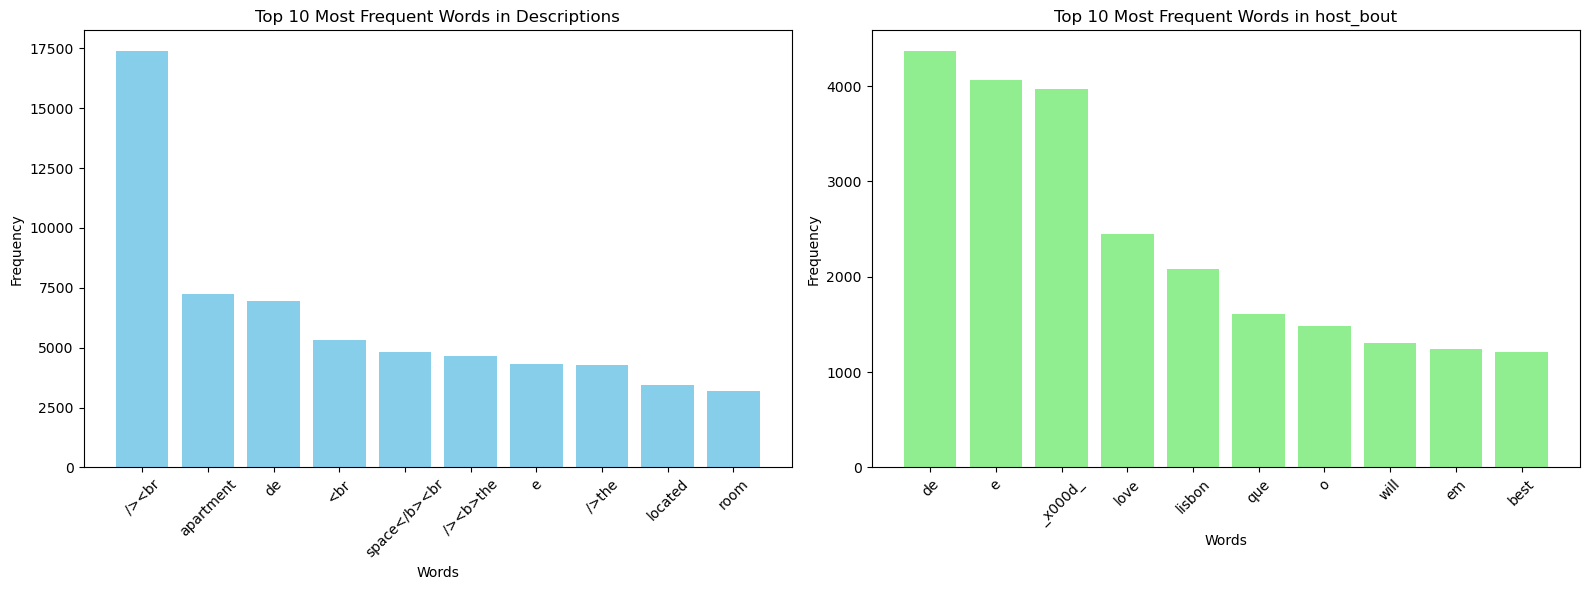

In [181]:
from collections import Counter
from wordcloud import STOPWORDS

def count_word_frequencies(text_column, num_words=10):
    # Join all text from the specified column into a single string
    all_text = ' '.join(text_column)

    # Convert text to lowercase and split into words
    words = all_text.lower().split()

    # Filter out common stop words
    words = [word for word in words if word not in STOPWORDS]

    # Count word frequencies
    word_counts = Counter(words)

    # Get the most common words and their frequencies
    top_words = word_counts.most_common(num_words)

    return dict(top_words)

# Count word frequencies from the 'description' and 'host_about' columns
top_words_description = count_word_frequencies(train['description'])
top_words_host_about = count_word_frequencies(train['host_about'])

# Plotting the histograms of most frequent words for both columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for 'description' column
axes[0].bar(top_words_description.keys(), top_words_description.values(), color='skyblue')
axes[0].set_title('Top 10 Most Frequent Words in Descriptions')
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Plot for 'host_about' column
axes[1].bar(top_words_host_about.keys(), top_words_host_about.values(), color='lightgreen')
axes[1].set_title('Top 10 Most Frequent Words in host_bout')
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout and display plots
plt.tight_layout()
plt.show()

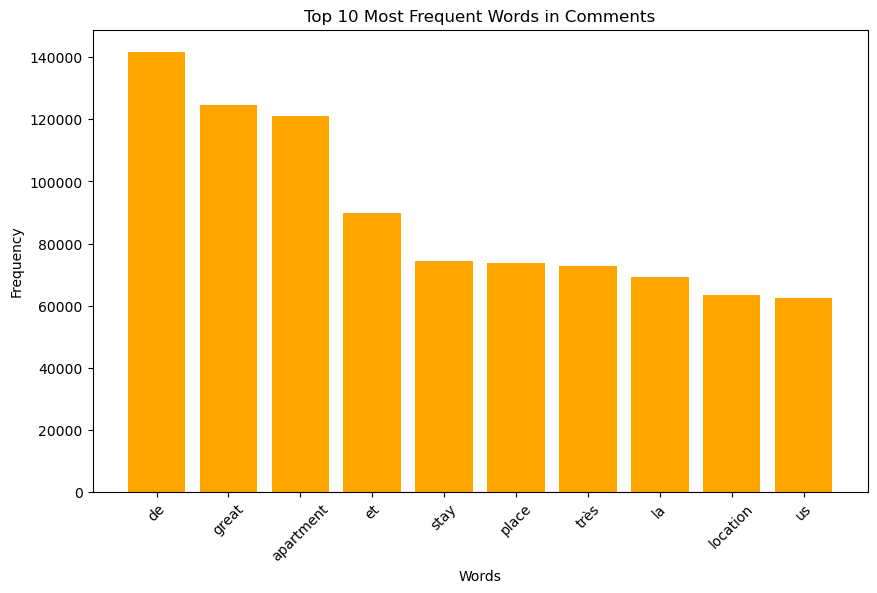

In [182]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

def count_word_frequencies(text_column, num_words=10):
    # Convert each comment to a string and concatenate them into a single text
    words = ' '.join(str(comment) for comment in text_column if pd.notna(comment)).lower().split()

    # Filter out common stop words
    words = [word for word in words if word not in STOPWORDS]

    # Count word frequencies
    word_counts = Counter(words)

    # Get the most common words and their frequencies
    top_words = word_counts.most_common(num_words)

    return dict(top_words)

# Count word frequencies from the 'comments' column
top_words_comments = count_word_frequencies(train_reviews['comments'])

# Plotting the histogram of most frequent words in 'comments' column
plt.figure(figsize=(10, 6))
plt.bar(top_words_comments.keys(), top_words_comments.values(), color='orange')
plt.title('Top 10 Most Frequent Words in Comments')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


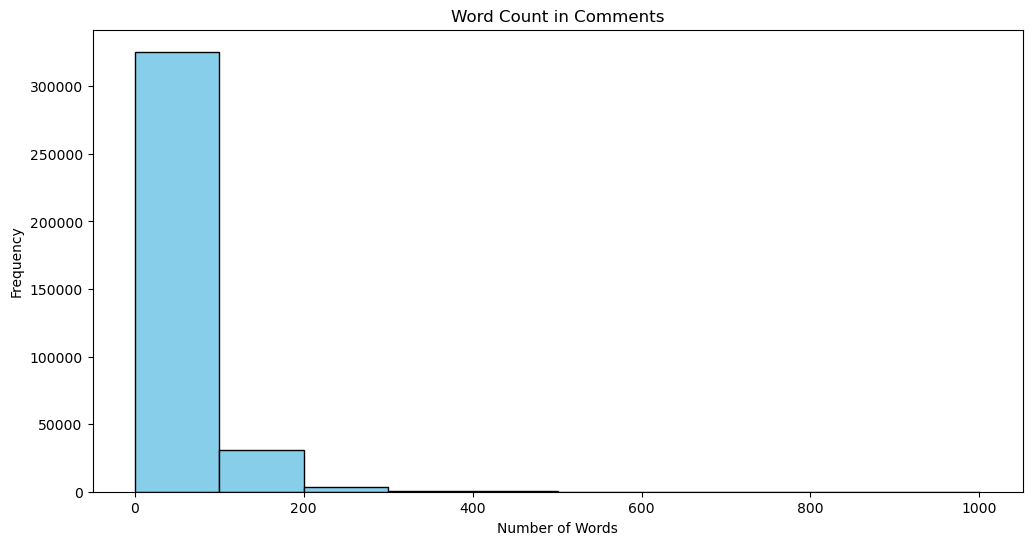

In [183]:
def count_words(text):
    # Convert text to string if it is not and handle NaN values
    if pd.isna(text):
        return 0
    return len(str(text).split())

# Apply word count function to the 'comments' column
train_reviews['comments_word_count'] = train_reviews['comments'].apply(count_words)

# Plot histogram
plt.figure(figsize=(12, 6))
plt.hist(train_reviews['comments_word_count'], bins=10, color='skyblue', edgecolor='black')
plt.title('Word Count in Comments')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


In [184]:
def find_unique_matches(data, column):
    # Convert column data to string type (handle NaN values gracefully)
    column_data = data[column].astype(str)
    
    # Concatenate all comments into a single string
    all_comments = ' '.join(column_data)
    
    # Define a regular expression pattern to match small words and punctuation marks
    pattern = r'\b\w{1,2}\b|[^\w\s]'
    
    # Find all matches of the pattern in the concatenated string
    matches = re.findall(pattern, all_comments)
    
    # Return unique matches using a set comprehension
    return set(matches)


unique_matches = find_unique_matches(train_reviews, 'comments')

# Print the unique small words and punctuation marks
print("Unique small words and punctuation marks:")
print(list(unique_matches))


Unique small words and punctuation marks:
['원할', 'Îl', '걱정', '했기', '잠궈', '讚讚', 'gb', 'TL', '방만', 'H3', '词典', 'Az', '안', '춥게', 'xl', '3⁰', 'Į', '순', '⬛', '계단', '15', '이', '쉽지', '구운', 'St', '잘땐', 'mr', '暖气', '버터', '키를', 'td', '필수', '삼일', 'AC', 'sq', 'עד', 'os', '주소', 'LG', '不错', '8m', 'Вы', '1k', '있는', 'по', '갈', '차량', 'є', 'on', '🎨', '💞', '&', 'Z', '바가', 'Xx', '배수', 'ㅜㅜ', '🌞', 'år', '암튼', 'MK', '푸른', '하니', '맡아', ']', '쪽문', '인듯', '터라', '고생', '4h', 'Oz', '5o', 'ом', '그닥', '조곰', 'TB', 'זה', 'BZ', 'Ни', '딱임', '・', 'q', '했던', '🎥', 'ду', '안돼', 'vz', '다신', '36', '나쁜', 'BO', 'ed', '비용', 'ía', '말이', '„', '짧고', 'th', 'σ', '66', 'JM', '♂', '💃', 'á', '한병', 'AD', 'ví', 'BQ', '뭣한', '큼', '무릐', '사이', '£', '답은', '와', 'T3', '빵을', '데를', '±', '08', 'AZ', '비해', '집잉', '💫', '구진', '가는', '😬', 'Sq', '54', '89', '지나', 'Am', '8a', '취해', 'A', '거의', '경험', 'EL', 'ух', '같아', '家', '{', '나를', '이런', '돌릴', '세고', 'Ty', '수압', '다한', '많기', '이상', '계속', '탈수', '2층', '밥을', '청결', 'ты', '들려', '알고', '휴지', '엄', 'Ev', '올해', '펍에', 'Gå'

lots of emojis and small words


In [185]:
merged_data = pd.merge(train, train_reviews,  on='houseID', how='left')



In [186]:
test_merged_data = pd.merge(test, test_reviews,  on='houseID', how='left')


In [187]:
merged_data.drop(["description_word_count", "host_about_word_count", "comments_word_count"], axis=1, inplace=True)


In [188]:
merged_data

,houseID,description,host_about,unlisted,description_language,comments,comment_language
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,en,this is a very cozy and comfortable house to s...,en
1,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,en,good<br/>,cy
2,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,en,"My first hostel experience, and all I have to ...",en
3,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,en,Das Hostel war neu und deshalb funktionierte a...,de
4,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,en,"It was fine for a dorm, but I think for the pe...",en
...,...,...,...,...,...,...,...
363279,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,en,The location was perfect. The apartment was ve...,en
363280,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,en,Ana's place is exactly as described and even b...,en
363281,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,en,A Ana foi muito atenciosa e preocupou se com o...,pt
363282,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,en,No wifi nor answer. <br/>The wifi can’t be con...,en


In [189]:
test_merged_data

,houseID,description,host_about,description_language,comments,comment_language
0,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",en,Thank you very much Antonio ! All has been per...,en
1,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",en,Very nice appartment in the old town of Lissab...,en
2,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",en,When travelling we're looking for kids friendl...,en
3,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",en,We've been in Lisbon in march 2013 (3 adults a...,en
4,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",en,Our host Antonio was very helpful with informa...,en
...,...,...,...,...,...,...
42081,695,Apartment with terrace located in the heart of...,Founded by travel enthusiasts (just like you) ...,en,Everything was fine!,en
42082,695,Apartment with terrace located in the heart of...,Founded by travel enthusiasts (just like you) ...,en,Very good located,en
42083,695,Apartment with terrace located in the heart of...,Founded by travel enthusiasts (just like you) ...,en,Appartement confortable conforme aux photos bi...,fr
42084,695,Apartment with terrace located in the heart of...,Founded by travel enthusiasts (just like you) ...,en,Très bon logement pour un week-end prolongé à ...,fr


In [190]:
merged_data.isna().sum()

houseID                    0
description                0
host_about                 0
unlisted                   0
description_language       0
comments                2005
comment_language        2003
dtype: int64

In [191]:
test_merged_data.isna().sum()

houseID                   0
description               0
host_about                0
description_language      0
comments                220
comment_language        220
dtype: int64

 For predicting whether an Airbnb listing is unlisted (0) or not (1), missing comments might indeed carry valuable information. The absence of comments could be an important feature in itself, potentially indicating something about the listing's status. Removing could lose some valuable info for predicting. 
 Different approaches : 
 

- Create a binary feature indicating whether a comment is missing (NaN) or not. This helps the model understand that the absence of a comment itself might be significant.
Fill Missing Comments with a Placeholder:

- Replace NaN values in the comments column with a placeholder text (e.g., "no_comment"). This ensures that all entries are treated as valid strings.

- both

In [192]:
merged_data['comments'].fillna('no_review', inplace=True)
test_merged_data['comments'].fillna('no_review', inplace=True)


In [193]:
merged_data.isna().sum()

houseID                    0
description                0
host_about                 0
unlisted                   0
description_language       0
comments                   0
comment_language        2003
dtype: int64

In [194]:
test_merged_data.isna().sum()

houseID                   0
description               0
host_about                0
description_language      0
comments                  0
comment_language        220
dtype: int64

In [195]:
merged_data['comment_language'].fillna('None', inplace=True)
test_merged_data['comment_language'].fillna('None', inplace=True)


### emojis treatment


The demojize() function takes a string as input and returns the string with the Unicode characters replaced by their corresponding emoji names. For example, if you pass the string “😀” to the demojize() function, it will return the string “smiley face”.
https://codeforgeek.com/python-emoji-module/ emoji for python
By default, the language is English (language='en') but also supported languages are:

Spanish ('es')

Portuguese ('pt')

Italian ('it')

French ('fr')

German ('de')

Farsi/Persian ('fa')

Indonesian ('id')

Simplified Chinese ('zh')

Japanese ('ja')

Korean ('ko')

Russian ('ru')

Arabic ('ar')

Turkish ('tr')

In [197]:
import emoji
import pandas as pd

# Function to check for emojis
def has_emojis(text):
    if pd.isnull(text):
        return False
    return emoji.emoji_count(str(text)) > 0

# Function to convert emojis to text
def convert_emojis_to_text(dataframe, column_text, column_language):
    dataframe_copy = dataframe.copy()

    def convert_text(text, language):
        if has_emojis(text):
            try:
                return emoji.demojize(text, language=language)
            except:
                return emoji.demojize(text, language='en')
        else:
            return text

    # Apply the conversion to each row
    dataframe_copy[column_text] = dataframe_copy.apply(
        lambda row: convert_text(row[column_text], row[column_language]), axis=1
    )
    
    return dataframe_copy






In [198]:
merged_data_demojized = convert_emojis_to_text(merged_data, 'comments', 'comment_language')



In [199]:
merged_data_demojized= convert_emojis_to_text(merged_data_demojized, 'description', 'description_language')

In [200]:
test_merged_data_demojized = convert_emojis_to_text(test_merged_data, 'comments', 'comment_language')
test_merged_data_demojized = convert_emojis_to_text(test_merged_data_demojized, 'description', 'description_language')



checking if there's still emojis

In [201]:
def print_comments_with_emojis(dataframe, column_text):
    with_emojis = dataframe[dataframe[column_text].apply(has_emojis)]
    print("Comments with emojis after processing:")
    for index, row in with_emojis.iterrows():
        print(f"Index {index}: {row[column_text]}")

print_comments_with_emojis(merged_data_demojized, 'comments')

Comments with emojis after processing:
Index 437: 👍
Index 831: 👍
Index 1044: Wspaniałe miejsce! <br/><br/>Gospodarz, który nas obsługiwał był niezwykle uprzejmy i pomocny. Gdy potrzebowaliśmy pomocy w nocy od razu się z nami skontaktował i pomógł nam natychmiast. Mieszkanie jest nowe, czyste, schludne, a okolica urokliwa i autentyczna. Do Lizbony centralnej jest dosłownie 30 minut spacerem. Jeśli planujesz urlop w Lizbonie, koniecznie rozważ tę ofertę, bo odpoczniesz i poczujesz się zaopiekowany. <br/><br/>Dziękujemy jeszcze raz za gościnę! 🥰
Index 2384: Good👌
Index 3135: Amazing 10/10😇
Index 5309: ♥️
Index 6095: 💚
Index 6178: 👍
Index 7108: Bardzo komfortowe mieszkanie . Ładne pokoje , komfortowe łazienki . Zlokalizowane  w cichej okolicy , blisko sklepiki lokalne .<br/>Bezproblemowe zameldowanie.  Do  centrum  kilka kroków, kilka schodków i jesteś na placu Rossio i na placu Martim Monitz  z którego rusza  słynny tramwaj 28!! Niedaleko Elevador da Lavra który  pomoże  zmęczonym dostać 

In [202]:
print_comments_with_emojis(merged_data_demojized, 'description')

Comments with emojis after processing:
Index 176748: 这是位于葡萄牙里斯本辛特拉的独栋私人别墅，位于著名度假胜地辛特拉高尔夫酒店的正对面，拥有里斯本最大的球场，5分钟即可到达沙滩🏖️<br /><br /><b>License number</b><br />Exempt


In [203]:
print_comments_with_emojis(test_merged_data_demojized, 'comments')

Comments with emojis after processing:
Index 109: Communicatie was super ! We kregen altijd onmiddellijk antwoord op onze vragen en Maria stuurde ons een lange lijst met veel informatie en leuke dingen om te doen in de stad ! Toen we vertrokken heeft ze ook de taxi geregeld die ons voor de deur heeft opgepikt 👌🏻 het appartement is ideaal gelegen , rustige buurt maar vlak bij veel leuke restaurantjes en cafés. Het appartement heeft veel charme maar voelt een beetje verouderd aan. De keuken is oud en ruikt wat muf. Badkamer en slaapkamers waren wel proper ! De koer was ideaal maar ook een beetje verwilderd. Al bij al hebben we enorm genoten van ons verblijf !
Index 1445: Dit appartement is een topper! Diego heeft ons heel goed ontvangen. Het appartement heeft een hele goeie locatie. Midden in een winkelstraat en maar een minuutje stappen van de metro 😉.
Index 1570: Amazing 🌊
Index 3007: 😁
Index 4838: Very nice place !!❤️
Index 7134: Een echte aanrader! Super goede communicatie met de hos

We still have a very small percentage of emojis remaining after running the conversion function, it might be due to several factors such as unsupported emojis, non-standard emoji representations, or limitations in the emoji library. In our to prevent data leakage our decisions will be based on training data, and the test data is processed using the same rules established from the training data.



Based on the training set, we created a dictionary mapping emojis to their textual representations. Any emoji not found in the custom dictionary will be replaced with a generic placeholder :emoji:

textual representations can be found here: https://www.w3schools.com/charsets/ref_emoji_smileys.asp

https://www.geeksforgeeks.org/convert-emoji-into-text-in-python/

In [206]:
remaining_emoji_dict = {
    '💥': ':collision:',
    '🤭': ':face_with_hand_over_mouth:',
    '☺️': ':white_smiling_face:',
    '🤩': ':star-struck:',
    '💪🏽': ':flexed_biceps_dark_skin_tone:',
    '👍': ':thumbs_up:',
    '⭐': ':star:',
    '😊': ':smiling_face_with_smiling_eyes:',
    '👌': ':ok_hand:',
    '👌🏼': ':ok_hand::light_skin_tone:',
    '👍🏻': ':thumbs_up_light_skin_tone:',
    '👍🏽': ':thumbs_up_medium-dark_skin_tone:',
    '😘': ':face_blowing_a_kiss:',
    '🤗': ':hugging_face:',
    '😉': ':winking_face:',
    '🌟': ':glowing_star:',
    '🙂': ':slightly_smiling_face:',
    '😱': ':face_screaming_in_fear:',
    '😃': ':grinning_face_with_big_eyes:',
    '❤️': ':heart:',
    '🥰': ':smiling_face_with_hearts:',
    '😇':'smiling_face_with_halo:',
    '🤙🏼': ":call_me_hand_medium-light_skin_tone:",
    '🤙': ":call_me_hand:",
    '👏': ':clapping_hands:',
    '👏🏼': ':clapping_hands::light_skin_tone:',
    '💚': ':green_heart:',
    '🙂': ':slightly_smiling_face:',
    '🔝': ':top_arrow:',
    '👌🏽': ':ok_hand::medium_skin_tone:',
    '😁': ':beaming_face_with_smiling_eyes:',
    '😂': ':face_with_tears_of_joy:',
    '🇵🇹': ':flag_Portugal:',
    '😍': ':smiling_face_with_heart-eyes:',
    '✨': ':sparkles:',
    '🙏🏻': ':folded_hands::light_skin_tone:',
    '⭐': ':star:',
    '😏': ':smirking_face:',
    '😋': ':face_savoring_food:',
    '🐝': ':honeybee:',
    '😎': ':smiling_face_with_sunglasses:',
    '💯': ':hundred_points:',
    '🎇': ':sparkler:',
    '🖤': ':black_heart:',
    '😌': ':relieved_face:',
    '🐈': ':cat:',
    '🎈': ':balons:',
    '💕': ':two_hearts:',
    '🚀': ':rocket:',
    '🌞': ':sun_with_face:',
    '🍋': ':lemon:',
    '😜':':stuck_out_tongue_winking_eye:',
    '🪨': ':rock:',
    '✌️': ':victory_hand:',
    '🔑': ':key:',
    '😃': ':grinning_face_with_big_eyes:',
    '😀':':grinning_face:',
    '✔️':':check_mark:',
    '🉐':':Japanese_acceptable_button:',
    '🤪':':zany_face:',
    '😆': ':grinning_squinting_face:',
    '🌅': ':sunrise:',
    '🌸': ':cherry_blossom:',
    '🦫': ':beaver:',
    '🎷': ':saxophone:',
    '🔥':':fire:',
    '🐐':':goat:',
    '🤝':':handshake:',
    '☹️':':frowning_face:',
    '☀️':':sun:',
    '🌱': ':seedling:',
    '✅': ':white_heavy_check_mark:',
    '🌹': ':rose:',
    '🙈': ':see-no-evil_monkey:',
    '💗': ':growing_heart:',
    '🏖️': ':beach:',
    '👌🏾': ':ok_hand::medium-dark_skin_tone:',
    '♥️': ':heart_suit:',
    '❤️': ':red_heart:',
    '🙌🏻':':raising_hands::light_skin_tone:',
    '🙌🏾':':raising_hands::medium-dark_skin_tone:',
    '☔':':umbrella_with_rain_drops:',
    '🇧🇪':':flag_Belgium:',
    '👎🏽':':thumbs_down::medium_skin_tone:',
    '👍🏼':':thumbs_up::medium-light_skin_tone:',
    '🤨':':face_with_raised_eyebrow:',
    '😭':':loudly_crying_face:',
    '👍🏾':':thumbs_up::medium-dark_skin_tone:',
    '🤟🏻':':love-you_gesture::light_skin_tone:',
    '🙁':':slightly_frowning_face:',
    '🤣':':rolling_on_the_floor_laughing:',
    '👌🏿':':ok_hand::dark_skin_tone:',
    '🇩🇰':':flag_Denmark:',
    '❣️':':heavy_heart_exclamation_mark_ornament:',
    
    
    
    
}



In [207]:
import emoji


import emoji

# Define a function to check if a text contains any emojis
def has_emojis(text):
    return any(emoji.is_emoji(char) for char in text)

# Define a function to replace the remaining emojis using a custom dictionary
def custom_replace_remaining_emojis(text, emoji_dict):
    for emj, desc in emoji_dict.items():
        text = text.replace(emj, desc)
    return text

# Define a function to replace any unknown emojis with a placeholder
def replace_unknown_emojis(text):
    return emoji.replace_emoji(text, replace=":emoji:")

# Define a function to process remaining emojis in the dataframe
def process_remaining_emojis(dataframe, column_text, emoji_dict):
    dataframe_copy = dataframe.copy()

    def convert_text_with_remaining_dict(text):
        if has_emojis(text):
            text = custom_replace_remaining_emojis(text, emoji_dict)
            text = replace_unknown_emojis(text)
            return text
        else:
            return text

    dataframe_copy[column_text] = dataframe_copy[column_text].apply(convert_text_with_remaining_dict)
    return dataframe_copy






In [208]:
merged_data_demojized = process_remaining_emojis(merged_data_demojized, 'comments', remaining_emoji_dict)
merged_data_demojized = process_remaining_emojis(merged_data_demojized, 'description', remaining_emoji_dict)
test_merged_data_demojized = process_remaining_emojis(test_merged_data_demojized, 'description', remaining_emoji_dict)
test_merged_data_demojized = process_remaining_emojis(test_merged_data_demojized, 'comments', remaining_emoji_dict)






In [209]:
def print_comments_with_emojis(dataframe, column_text):
    with_emojis = dataframe[dataframe[column_text].apply(has_emojis)]
    print("Comments with emojis after processing:")
    for index, row in with_emojis.iterrows():
        print(f"Index {index}: {row[column_text]}")

print_comments_with_emojis(merged_data_demojized, 'comments')
print_comments_with_emojis(test_merged_data_demojized, 'comments')
print_comments_with_emojis(merged_data_demojized, 'description')
print_comments_with_emojis(test_merged_data_demojized, 'description')

Comments with emojis after processing:
Comments with emojis after processing:
Comments with emojis after processing:
Comments with emojis after processing:


# Train- test- Split

In [210]:
merged_data_demojized

,houseID,description,host_about,unlisted,description_language,comments,comment_language
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,en,this is a very cozy and comfortable house to s...,en
1,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,en,good<br/>,cy
2,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,en,"My first hostel experience, and all I have to ...",en
3,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,en,Das Hostel war neu und deshalb funktionierte a...,de
4,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,en,"It was fine for a dorm, but I think for the pe...",en
...,...,...,...,...,...,...,...
363279,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,en,The location was perfect. The apartment was ve...,en
363280,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,en,Ana's place is exactly as described and even b...,en
363281,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,en,A Ana foi muito atenciosa e preocupou se com o...,pt
363282,6248,These apartments are very well located in a go...,A base da minha vida é a minha família e a min...,0,en,No wifi nor answer. <br/>The wifi can’t be con...,en


In [211]:
test_merged_data_demojized

,houseID,description,host_about,description_language,comments,comment_language
0,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",en,Thank you very much Antonio ! All has been per...,en
1,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",en,Very nice appartment in the old town of Lissab...,en
2,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",en,When travelling we're looking for kids friendl...,en
3,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",en,We've been in Lisbon in march 2013 (3 adults a...,en
4,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",en,Our host Antonio was very helpful with informa...,en
...,...,...,...,...,...,...
42081,695,Apartment with terrace located in the heart of...,Founded by travel enthusiasts (just like you) ...,en,Everything was fine!,en
42082,695,Apartment with terrace located in the heart of...,Founded by travel enthusiasts (just like you) ...,en,Very good located,en
42083,695,Apartment with terrace located in the heart of...,Founded by travel enthusiasts (just like you) ...,en,Appartement confortable conforme aux photos bi...,fr
42084,695,Apartment with terrace located in the heart of...,Founded by travel enthusiasts (just like you) ...,en,Très bon logement pour un week-end prolongé à ...,fr


In [212]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(merged_data_demojized[['description', 'host_about', 'description_language', 'comments', 'comment_language']], merged_data_demojized[['unlisted', 'houseID']], test_size=0.2, random_state=42)





In [213]:
# Create copies of the split data
X_train_copy = X_train.copy()
X_val_copy = X_val.copy()
y_train_copy = y_train.copy()
y_val_copy = y_val.copy()


In [214]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 290627 entries, 296776 to 121958
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   description           290627 non-null  object
 1   host_about            290627 non-null  object
 2   description_language  290627 non-null  object
 3   comments              290627 non-null  object
 4   comment_language      290627 non-null  object
dtypes: object(5)
memory usage: 13.3+ MB


In [215]:
X_train

,description,host_about,description_language,comments,comment_language
296776,This apartment is the best choice for those wh...,"Hi, my name is David and I'm renting out sever...",en,Very good stay and trip to Lisbon!!_x000D_<br/...,en
97872,"""Bijou, cute, amazing, lovers' retreat, honeym...","I am english, living in Sintra, and my husband...",en,Beautiful spot. Incredible setting and view. L...,en
306410,Bairro Alto is one of the liveliest and younge...,"Bairro Alto, fun & rock & roll",en,המקום היה מעל לכל צפייה.<br/>המאחר היה אכפתי ו...,he
35677,Located in one of the most traditional distric...,Hometown Experience Lisbon is a company specia...,en,Thank you for making us feel very welcome Char...,en
230579,"Central location, ideal for exploring Lisbon. ...",I worked as a Deck Officer in the Portuguese ...,en,"Que des compliments. Très bon accueil, appart ...",fr
...,...,...,...,...,...
119879,The Mouraria Duplex Apartment is located on th...,I am from Portugal and I love traveling,en,"Logement conforme à la description, vraiment t...",fr
259178,Amazing Modern one bedroom apartment near Merc...,We are Feels Like Home Holiday Rentals.\nA com...,en,Great location! Stylish apartment with many am...,en
131932,A Fantastic Comfy 1 Bed Apartment with finely ...,"Hello,\nI´m from Tomar, used to live in London...",en,We had a great time at William's flat. He was ...,en
146867,Bed in a 4 mixed dorm shared wc<br /><br /><b>...,"If you’re looking for a fun, fresh and friendl...",en,I Highly recommend this hostel.,en


In [216]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72657 entries, 106895 to 63768
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   description           72657 non-null  object
 1   host_about            72657 non-null  object
 2   description_language  72657 non-null  object
 3   comments              72657 non-null  object
 4   comment_language      72657 non-null  object
dtypes: object(5)
memory usage: 3.3+ MB


In [217]:
X_val

,description,host_about,description_language,comments,comment_language
106895,The room in Original Lisbon Guesthouse is in t...,"In my later years, I have looked in the mirror...",en,Lage ist super und die Unterkunft generell auc...,de
242589,GREAT LOCATION!<br />150 meters from Avenida d...,ANA_x000D_\nMy name is Ana and I'm married. We...,en,Perfect location for a weekend in the city. An...,en
312957,"Charming apartment with Pool, Free indoor gar...","Since when i traveled from Holand to Hungary, ...",en,Very Comfortable bed and great power shower. ...,en
204238,"Private bedroom in a genuinely portuguese, sha...",We came to live here a few years ago and a few...,en,"Ottima posizione, pulizia sia della camera che...",it
321562,"Situated in Graça (just next to Alfama), one o...","We are Elsa and Rui, computer engineers and en...",en,"una estancia agradable! nos ha gustado, hemos ...",es
...,...,...,...,...,...
18324,"Hello traveler, if you are looking for the per...","Hi world, my name is João Figueira, I am 35 ye...",en,This is one of two apartments my family and I ...,en
134138,A compact charming apartment with a view over ...,Founded by travel enthusiasts (just like you) ...,en,Location is king here! Close to everything a c...,en
162770,<b>The space</b><br />This apartment is locate...,Portuguese design and history enthusiast that ...,en,This place is perfection. An incredible apartm...,en
360937,A spectacular apartment in the center of the h...,Chamo-me Sónia e tenho 30 anos. _x000D_\nNasci...,en,Beau logement très bien placé dans le centre h...,fr


In [218]:
y_train.info()  

<class 'pandas.core.frame.DataFrame'>
Index: 290627 entries, 296776 to 121958
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   unlisted  290627 non-null  int64
 1   houseID   290627 non-null  int64
dtypes: int64(2)
memory usage: 6.7 MB


In [219]:
y_train

,unlisted,houseID
296776,0,5085
97872,0,1646
306410,0,5277
35677,0,624
230579,0,3923
...,...,...
119879,0,2020
259178,0,4435
131932,0,2229
146867,0,2483


In [220]:
y_val

,unlisted,houseID
106895,0,1783
242589,0,4140
312957,0,5416
204238,0,3449
321562,0,5579
...,...,...
18324,0,336
134138,0,2261
162770,0,2724
360937,0,6202


# Pre-Processing

### Cleaning Language

In [222]:
language_counts = X_train['description_language'].value_counts()

total_entries = len(X_train)
language_percentages = (language_counts / total_entries) * 100

print("\nLanguage description Percentages:")
print(language_percentages)


Language description Percentages:
description_language
en       90.267938
pt        7.957279
fr        0.876725
da        0.386750
es        0.258751
de        0.228472
zh-cn     0.019613
no        0.001376
it        0.001376
ca        0.001032
nl        0.000688
Name: count, dtype: float64


Como ingles e portugues representam 98% eu acho que podiamos apagar as restantes linguas até porque testamos com o translate e não funcionada muito bem e era demorado

In [223]:
language_counts = X_train['comment_language'].value_counts()

total_entries = len(X_train)
language_percentages = (language_counts / total_entries) * 100

print("\nLanguage comment Percentages:")
print(language_percentages)


Language comment Percentages:
comment_language
en         63.903560
fr         14.697189
pt          6.185248
es          5.299576
de          3.909134
it          1.559043
nl          0.990617
None        0.557416
ko          0.411524
ru          0.406707
zh-cn       0.291095
Unknown     0.259095
ro          0.219869
pl          0.164816
ca          0.155182
da          0.121806
sv          0.105978
af          0.092559
no          0.085677
so          0.079139
cs          0.059182
fi          0.049204
id          0.044731
tl          0.039570
hu          0.038537
ja          0.030623
cy          0.029591
zh-tw       0.026839
he          0.026839
hr          0.022710
sw          0.019269
sk          0.019269
tr          0.018581
lt          0.015484
el          0.013419
vi          0.011355
sl          0.011011
uk          0.010667
bg          0.005505
et          0.003785
lv          0.003441
ar          0.002065
sq          0.002065
mk          0.000688
ur          0.000344
Name: c

In [224]:
X_train.drop('host_about', axis=1, inplace=True)
X_val.drop('host_about', axis=1, inplace=True)
test_merged_data_demojized.drop('host_about', axis=1, inplace=True)

### Cleaning data (stopwords, lemmanize, lowering, stemming)

In [229]:
pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 12.1 MB/s eta 0:00:0000:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 13.5 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [230]:
pip install spacy polyglot pymorphy2 konlpy jieba janome

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.3/126.3 kB 2.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 43.2 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 21.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 33.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.0/182.0 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.0/133.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 40.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.0/490.0 kB 4.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [228]:
import re
import jieba
from janome.tokenizer import Tokenizer as JanomeTokenizer
from polyglot.text import Text as PolyglotText
from tqdm import tqdm
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer

import kobill
from konlpy.tag import Okt
from konlpy.corpus import kobill

stopwords_ko= stopwords_ko = set([line.strip() for line in open(kobill.stopwords(), encoding='utf-8')])

# Initialize stopwords and stemmers for supported languages
stopwords_dict = {
    'en': set(stopwords.words('english')),
    'fr': set(stopwords.words('french')),
    'pt': set(stopwords.words('portuguese')),
    'es': set(stopwords.words('spanish')),
    'de': set(stopwords.words('german')),
    'it': set(stopwords.words('italian')),
    'nl': set(stopwords.words('dutch')),
    'ru': set(stopwords.words('russian')),
    'ko': stopwords_ko,
    'zh-cn': set(stopwords.words('chinese')),
    'ro': set(stopwords.words('romanian')),
    'pl': set(stopwords.words('polish')),
    'ca': set(stopwords.words('catalan')),
    'da': set(stopwords.words('danish')),
    'sv': set(stopwords.words('swedish')),
    'af': set(stopwords.words('afrikaans')),
    'no': set(stopwords.words('norwegian')),
    'so': set(stopwords.words('somali')),
    'cs': set(stopwords.words('czech')),
    'fi': set(stopwords.words('finnish')),
    'id': set(stopwords.words('indonesian')),
    'tl': set(stopwords.words('tagalog')),
    'hu': set(stopwords.words('hungarian')),
    'ja': set(stopwords.words('japanese')),
    'cy': set(stopwords.words('welsh')),
    'zh-tw': set(stopwords.words('chinese')),
    'he': set(stopwords.words('hebrew')),
    'hr': set(stopwords.words('croatian')),
    'sw': set(stopwords.words('swahili')),
    'sk': set(stopwords.words('slovak')),
    'tr': set(stopwords.words('turkish')),
    'lt': set(stopwords.words('lithuanian')),
    'el': set(stopwords.words('greek')),
    'vi': set(stopwords.words('vietnamese')),
    'sl': set(stopwords.words('slovenian')),
    'uk': set(stopwords.words('ukrainian')),
    'bg': set(stopwords.words('bulgarian')),
    'et': set(stopwords.words('estonian')),
    'lv': set(stopwords.words('latvian')),
    'ar': set(stopwords.words('arabic')),
    'sq': set(stopwords.words('albanian')),
    'mk': set(stopwords.words('macedonian')),
    'ur': set(stopwords.words('urdu'))
}

stemmers_dict = {
    'en': SnowballStemmer('english'),
    'fr': SnowballStemmer('french'),
    'pt': SnowballStemmer('portuguese'),
    'es': SnowballStemmer('spanish'),
    'de': SnowballStemmer('german'),
    'it': SnowballStemmer('italian'),
    'nl': SnowballStemmer('dutch'),
    'ru': SnowballStemmer('russian'),
    'ro': SnowballStemmer('romanian'),
    'pl': SnowballStemmer('polish'),
    'ca': SnowballStemmer('catalan'),
    'da': SnowballStemmer('danish'),
    'sv': SnowballStemmer('swedish'),
    'af': SnowballStemmer('afrikaans'),
    'no': SnowballStemmer('norwegian'),
    'cs': SnowballStemmer('czech'),
    'fi': SnowballStemmer('finnish'),
    'id': SnowballStemmer('indonesian'),
    'tl': SnowballStemmer('tagalog'),
    'hu': SnowballStemmer('hungarian'),
    'cy': SnowballStemmer('welsh'),
    'he': SnowballStemmer('hebrew'),
    'hr': SnowballStemmer('croatian'),
    'sw': SnowballStemmer('swahili'),
    'sk': SnowballStemmer('slovak'),
    'tr': SnowballStemmer('turkish'),
    'lt': SnowballStemmer('lithuanian'),
    'el': SnowballStemmer('greek'),
    'vi': SnowballStemmer('vietnamese'),
    'sl': SnowballStemmer('slovenian'),
    'uk': SnowballStemmer('ukrainian'),
    'bg': SnowballStemmer('bulgarian'),
    'et': SnowballStemmer('estonian'),
    'lv': SnowballStemmer('latvian'),
    'ar': SnowballStemmer('arabic'),
    'sq': SnowballStemmer('albanian'),
    'mk': SnowballStemmer('macedonian'),
    'ur': SnowballStemmer('urdu')
}

lemma = WordNetLemmatizer()

def clean_text(text, language='en', use_lemmatizer=True, use_stemmer=False):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove HTML tags and non-alphabetic characters
    text = re.sub("<br />", " ", text)
    text = re.sub("[^a-zA-Z]", " ", text)
    
    # Select stopwords and stemmer based on language
    stop = stopwords_dict.get(language, set())
    stemmer = stemmers_dict.get(language)
    
    # Remove stopwords
    text = " ".join([word for word in text.split() if word not in stop])
    
    # Apply lemmatization (only for English)
    if use_lemmatizer and language == 'en':
        text = " ".join(lemma.lemmatize(word) for word in text.split())
    
    # Apply stemming
    if use_stemmer and stemmer:
        text = " ".join(stemmer.stem(word) for word in text.split())
        
    return text

def clean_comments(df, use_lemmatizer=True, use_stemmer=False):
    tqdm.pandas()  # Initialize tqdm for progress_apply
    
    # Filter DataFrame to include only supported languages
    supported_languages = list(stopwords_dict.keys())
    df = df[df['language'].isin(supported_languages)]
    
    # Print the DataFrame before cleaning (for debugging purposes)
    print("DataFrame before cleaning:\n", df.head())
    
    # Apply the clean_text function to each comment in the DataFrame
    df['clean_comments'] = df.progress_apply(
        lambda row: clean_text(row['comments'], row['language'], use_lemmatizer, use_stemmer), axis=1
    )
    
    # Return the cleaned DataFrame
    return df




SyntaxError: invalid syntax (545755800.py, line 6)

In [ ]:
import re
from tqdm import tqdm
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer

# Initialize stopwords and stemmers
stopwords_en = set(stopwords.words('english'))
stopwords_pt = set(stopwords.words('portuguese'))
stemmer_en = SnowballStemmer('english')
stemmer_pt = SnowballStemmer('portuguese')
lemma = WordNetLemmatizer()


def clean_text(text, language='en', use_lemmatizer=True, use_stemmer=False):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove HTML tags and non-alphabetic characters
    text = re.sub("<br />", " ", text)
    text = re.sub("[^a-zA-Z]", " ", text)
    
    # Select stopwords and stemmer based on language
    if language in ['english', 'en']:
        stop = stopwords_en
        stemmer = stemmer_en
    elif language in ['portuguese', 'pt']:
        stop = stopwords_pt
        stemmer = stemmer_pt
    else:
        raise ValueError("Unsupported language: " + language)
    
    # Remove stopwords
    text = " ".join([word for word in text.split() if word not in stop])
    
    # Apply lemmatization (only for English)
    if use_lemmatizer and language in ['english', 'en']:
        text = " ".join(lemma.lemmatize(word) for word in text.split())
    
    # Apply stemming
    if use_stemmer:
        text = " ".join(stemmer.stem(word) for word in text.split())
        
    return text

def clean_comments(df, use_lemmatizer=True, use_stemmer=False):
    tqdm.pandas()  # Initialize tqdm for progress_apply
    
    # Filter DataFrame to include only supported languages
    df = df[df['language'].isin(['english', 'portuguese', 'en', 'pt'])]
    
    # Print the DataFrame before cleaning (for debugging purposes)
    print("DataFrame before cleaning:\n", df.head())
    
    # Apply the clean_text function to each comment in the DataFrame
    df['clean_comments'] = df.progress_apply(
        lambda row: clean_text(row['comments'], row['language'], use_lemmatizer, use_stemmer), axis=1
    )
    
    # Return the cleaned DataFrame
    return df

# Clean the comments in the DataFrame with lemmatization only
X_train_clean = clean_comments(X_train, use_lemmatizer=True, use_stemmer=False)
print("DataFrame after cleaning (lemmatization only):\n", X_train_clean)



DataFrame before cleaning:
                                               description  \
296776  This apartment is the best choice for those wh...   
97872   "Bijou, cute, amazing, lovers' retreat, honeym...   
306410  Bairro Alto is one of the liveliest and younge...   
35677   Located in one of the most traditional distric...   
230579  Central location, ideal for exploring Lisbon. ...   

                                               host_about language  \
296776  Hi, my name is David and I'm renting out sever...       en   
97872   I am english, living in Sintra, and my husband...       en   
306410                     Bairro Alto, fun & rock & roll       en   
35677   Hometown Experience Lisbon is a company specia...       en   
230579   I worked as a Deck Officer in the Portuguese ...       en   

                                                 comments  
296776  Very good stay and trip to Lisbon!!_x000D_<br/...  
97872   Beautiful spot. Incredible setting and view. L...  
3064

100%|██████████| 285378/285378 [00:42<00:00, 6788.92it/s]

DataFrame after cleaning (lemmatization only):
                                               description  \
296776  This apartment is the best choice for those wh...   
97872   "Bijou, cute, amazing, lovers' retreat, honeym...   
306410  Bairro Alto is one of the liveliest and younge...   
35677   Located in one of the most traditional distric...   
230579  Central location, ideal for exploring Lisbon. ...   
...                                                   ...   
119879  The Mouraria Duplex Apartment is located on th...   
259178  Amazing Modern one bedroom apartment near Merc...   
131932  A Fantastic Comfy 1 Bed Apartment with finely ...   
146867  Bed in a 4 mixed dorm shared wc<br /><br /><b>...   
121958  Ideal para  2 pessoas pode acomoda até 4 pesso...   

                                               host_about language  \
296776  Hi, my name is David and I'm renting out sever...       en   
97872   I am english, living in Sintra, and my husband...       en   
306410   

In [ ]:
X_train_clean

,description,host_about,language,comments,clean_comments
296776,This apartment is the best choice for those wh...,"Hi, my name is David and I'm renting out sever...",en,Very good stay and trip to Lisbon!!_x000D_<br/...,good stay trip lisbon x br apartment identical...
97872,"""Bijou, cute, amazing, lovers' retreat, honeym...","I am english, living in Sintra, and my husband...",en,Beautiful spot. Incredible setting and view. L...,beautiful spot incredible setting view lovely ...
306410,Bairro Alto is one of the liveliest and younge...,"Bairro Alto, fun & rock & roll",en,המקום היה מעל לכל צפייה.<br/>המאחר היה אכפתי ו...,br br br br br br br br br br br br
35677,Located in one of the most traditional distric...,Hometown Experience Lisbon is a company specia...,en,Thank you for making us feel very welcome Char...,thank making u feel welcome charlie patricia a...
230579,"Central location, ideal for exploring Lisbon. ...",I worked as a Deck Officer in the Portuguese ...,en,"Que des compliments. Très bon accueil, appart ...",que de compliment tr bon accueil appart ultra ...
...,...,...,...,...,...
119879,The Mouraria Duplex Apartment is located on th...,I am from Portugal and I love traveling,en,"Logement conforme à la description, vraiment t...",logement conforme la description vraiment tr b...
259178,Amazing Modern one bedroom apartment near Merc...,We are Feels Like Home Holiday Rentals.\nA com...,en,Great location! Stylish apartment with many am...,great location stylish apartment many amenity ...
131932,A Fantastic Comfy 1 Bed Apartment with finely ...,"Hello,\nI´m from Tomar, used to live in London...",en,We had a great time at William's flat. He was ...,great time william flat welcoming asked x br p...
146867,Bed in a 4 mixed dorm shared wc<br /><br /><b>...,"If you’re looking for a fun, fresh and friendl...",en,I Highly recommend this hostel.,highly recommend hostel


### Removing Punctuation

In [ ]:
def remove_punctuation(text):
    punctuation_set = set(string.punctuation)
    
    text_no_punctuation = ''.join([char for char in text if char not in punctuation_set])
    
    return text_no_punctuation

X_train["comments"] = X_train["comments"].apply(remove_punctuation)


### Removing accents 

In [ ]:
from unidecode import unidecode
import unicodedata
import re

accent_mapping = {
    'à': 'a', 'á': 'a', 'â': 'a', 'ã': 'a', 'ä': 'a', 'å': 'a', 'æ': 'ae', 'ā': 'a',
    'è': 'e', 'é': 'e', 'ê': 'e', 'ë': 'e', 'ē': 'e',
    'ì': 'i', 'í': 'i', 'î': 'i', 'ï': 'i',
    'ò': 'o', 'ó': 'o', 'ô': 'o', 'õ': 'o', 'ö': 'o', 'ø': 'o', 'œ': 'oe',
    'ù': 'u', 'ú': 'u', 'û': 'u', 'ü': 'u', 'ū': 'u', 'ů': 'u',
    'ç': 'c',
    'ñ': 'n',
    'ś': 's', 'š': 's', 'ß': 'ss',
    'ź': 'z', 'ż': 'z', 'ž': 'z'
}

def remove_accents(text):
    for char in accent_mapping:
        text = text.replace(char, accent_mapping[char])
    return text

X_train["comments"] = X_train["comments"].apply(remove_accents)


### Tokenization

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')  
nltk.download('wordnet')

In [ ]:
X_train["comments"] = X_train['comments'].apply(word_tokenize)